In [26]:
import numpy as np
from scipy import stats
import pyvinecopulib as pv
import matplotlib.pyplot as plt
import matplotlib

save_fig = True

In [27]:
copula = pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[0.75]) 
u = copula.simulate(n=35, seeds = [2, 3, 3])

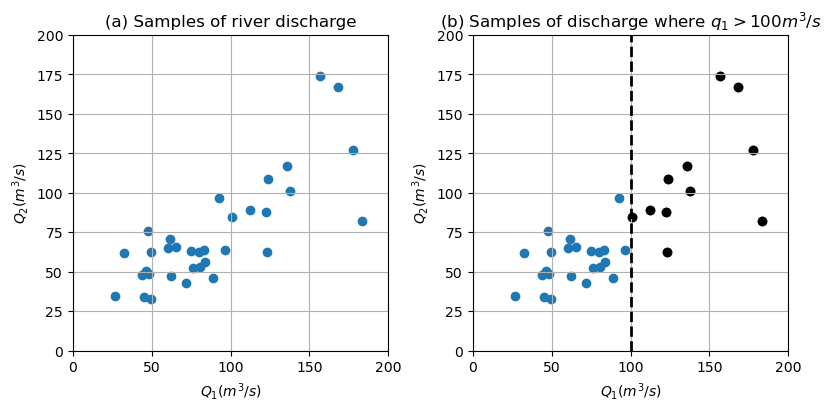

In [28]:
q1 = stats.gumbel_r.ppf(u[:,0],loc=76, scale=32)
q2 = stats.gumbel_r.ppf(u[:,1],loc=62, scale=27)

fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout = 'constrained')

axes[0].scatter(q1, q2)
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_xlabel('${Q_1 (m^3/s)}$')
axes[0].set_ylabel('${Q_2 (m^3/s)}$')
axes[0].grid()
axes[0].set_title('(a) Samples of river discharge')

limit_q1 = 100
mask = q1>limit_q1

axes[1].scatter(q1, q2)
axes[1].scatter(q1[mask], q2[mask], color ='k')
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].plot([100, 100], [0, 200], '--k', linewidth = 2)
axes[1].set_xlabel('${Q_1 (m^3/s)}$')
axes[1].set_ylabel('${Q_2 (m^3/s)}$')
axes[1].grid()
axes[1].set_title('(b) Samples of discharge where ${q_1 > 100 m^3/s}$')

if save_fig:
    fig.savefig('figures/samples_marginal.svg')

In [29]:
# limit_q1 = 100
# mask = [(q1<limit_q1)]
# sum(mask).sum()

limit_q2 = 75
mask = [(q2<limit_q2)]
sum(mask).sum()

np.int64(22)

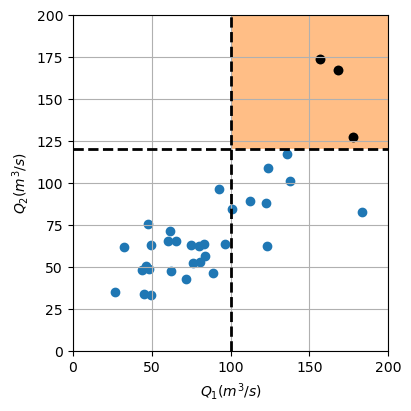

In [37]:
limit_q1 = 100
limit_q2 = 120
mask = [(q1>limit_q1) & (q2>limit_q2)]

fig, axes = plt.subplots(1, 1, figsize=(4, 4), layout = 'constrained')

axes.scatter(q1, q2)
axes.fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], alpha = 0.5)
axes.scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes.set_xlim([0, 200])
axes.set_ylim([0, 200])
axes.plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes.plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes.set_xlabel('${Q_1 (m^3/s)}$')
axes.set_ylabel('${Q_2 (m^3/s)}$')
axes.grid()

if save_fig:
    fig.savefig('figures/and_exceed.svg')

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\2889096404.py:17: SyntaxWarning: invalid escape sequence '\c'
  axes.set_title('(a) ${q_1 < 100 m^3/s \cap q_2 < 50 m^3/s}$')


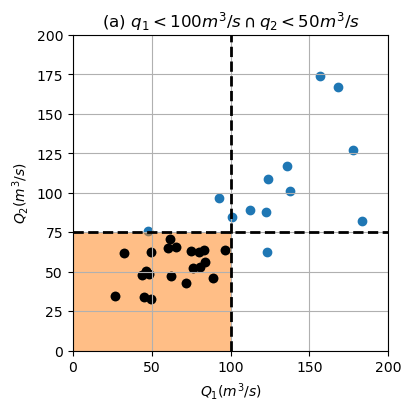

In [31]:
limit_q1 = 100
limit_q2 = 75
mask = [(q1<limit_q1) & (q2<limit_q2)]

fig, axes = plt.subplots(1, 1, figsize=(4, 4), layout = 'constrained')

axes.scatter(q1, q2)
axes.fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes.scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes.set_xlim([0, 200])
axes.set_ylim([0, 200])
axes.plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes.plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes.set_xlabel('${Q_1 (m^3/s)}$')
axes.set_ylabel('${Q_2 (m^3/s)}$')
axes.grid()
axes.set_title('(a) ${q_1 < 100 m^3/s \cap q_2 < 50 m^3/s}$')

if save_fig:
    fig.savefig('figures/and.svg')

In [32]:
23+22-21

24

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\972463224.py:6: SyntaxWarning: invalid escape sequence '\l'
  axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\972463224.py:18: SyntaxWarning: invalid escape sequence '\l'
  axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\972463224.py:41: SyntaxWarning: invalid escape sequence '\c'
  axes[2].set_title('(c) ${q_1 < 100 m^3/s \cup q_2 < 50 m^3/s}$')


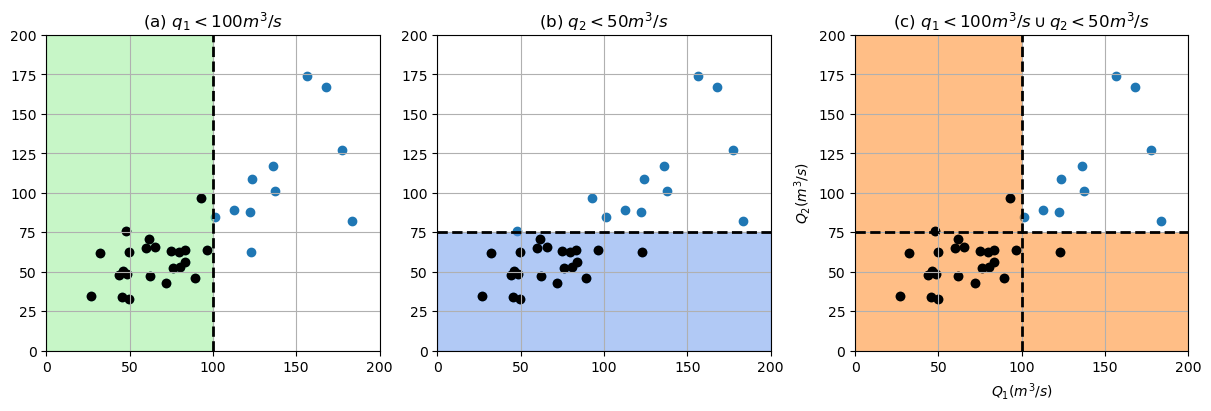

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), layout = 'constrained')

mask = [(q1<limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 < 100 m^3/s}$')


mask = [(q2<limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 < 50 m^3/s}$')


mask = [(q1<limit_q1) | (q2<limit_q2)]

axes[2].scatter(q1, q2)
# axes[2].fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes[2].fill([0, 200, 200, limit_q1, limit_q1, 0, 0], [0, 0, limit_q2, limit_q2, 200, 200, 0], alpha = 0.5)
# axes[2].fill([0, limit_q1, limit_q1, 0], [0, 0, limit_q2, limit_q2], alpha = 0.5)
axes[2].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[2].set_xlim([0, 200])
axes[2].set_ylim([0, 200])
axes[2].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[2].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[2].set_xlabel('${Q_1 (m^3/s)}$')
axes[2].set_ylabel('${Q_2 (m^3/s)}$')
axes[2].grid()
axes[2].set_title('(c) ${q_1 < 100 m^3/s \cup q_2 < 50 m^3/s}$')


if save_fig:
    fig.savefig('figures/or.svg')


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\3896959505.py:6: SyntaxWarning: invalid escape sequence '\l'
  axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\3896959505.py:18: SyntaxWarning: invalid escape sequence '\l'
  axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\3896959505.py:39: SyntaxWarning: invalid escape sequence '\c'
  axes[2].set_title('(c) ${q_1 > 100 m^3/s \cap q_2 > 50 m^3/s}$')


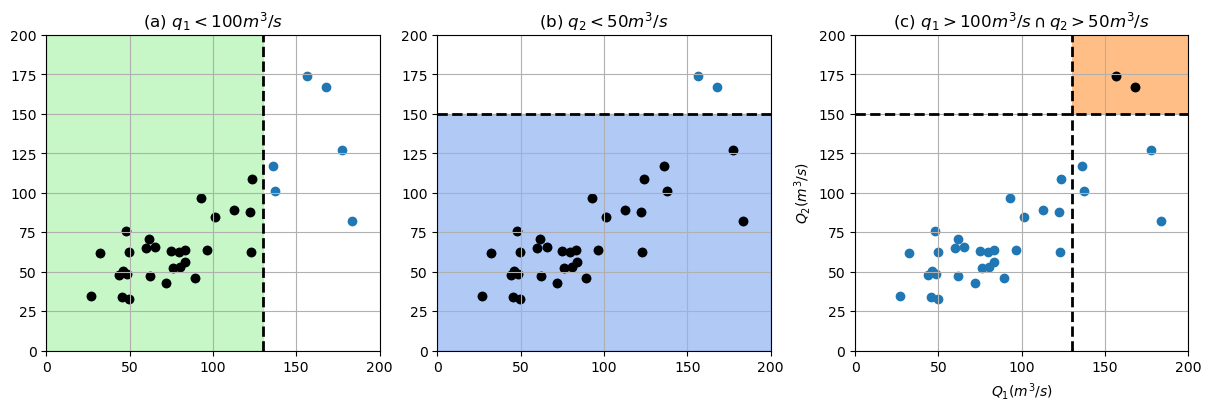

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), layout = 'constrained')

mask = [(q1<limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([0, limit_q1, limit_q1, 0], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 < 100 m^3/s}$')


mask = [(q2<limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([0, 200, 200, 0], [0, 0, limit_q2, limit_q2], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 < 50 m^3/s}$')


mask = [(q1>limit_q1) & (q2>limit_q2)]

axes[2].scatter(q1, q2)
axes[2].fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], alpha = 0.5)
axes[2].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[2].set_xlim([0, 200])
axes[2].set_ylim([0, 200])
axes[2].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[2].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[2].set_xlabel('${Q_1 (m^3/s)}$')
axes[2].set_ylabel('${Q_2 (m^3/s)}$')
axes[2].grid()
axes[2].set_title('(c) ${q_1 > 100 m^3/s \cap q_2 > 50 m^3/s}$')

if save_fig:
    fig.savefig('figures/and_computation.svg')

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_23644\1904169064.py:21: SyntaxWarning: invalid escape sequence '\l'
  axes[1].fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')


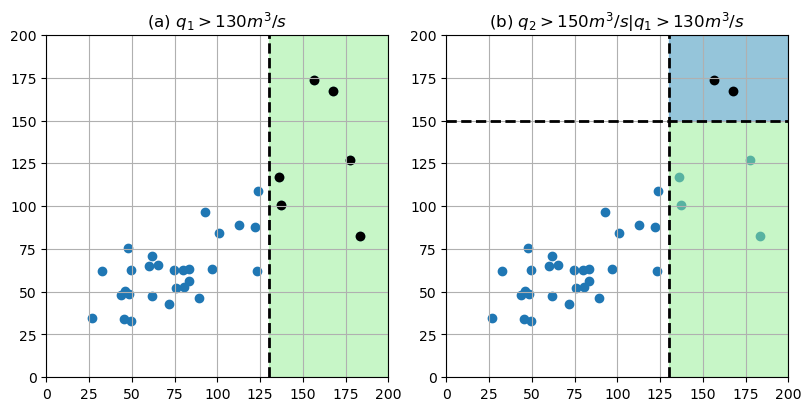

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), layout = 'constrained')

limit_q1 = 130

mask = [(q1>limit_q1)]

axes[0].scatter(q1, q2)
axes[0].fill([limit_q1, 200, 200, limit_q1], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5)
axes[0].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[0].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[0].grid()
axes[0].set_xlim([0, 200])
axes[0].set_ylim([0, 200])
axes[0].set_title('(a) ${q_1 > 130 m^3/s}$')

limit_q2 = 150
mask = [(q1>limit_q1) & (q2>limit_q2)]

axes[1].scatter(q1, q2)
axes[1].fill([limit_q1, 200, 200, limit_q1], [0, 0, 200, 200], color = 'lightgreen', alpha = 0.5)
axes[1].fill([limit_q1, 200, 200, limit_q1], [limit_q2, limit_q2, 200, 200], color = 'cornflowerblue', alpha = 0.5, label = '${q_2 \leq 75 m^3/s}$')
axes[1].scatter(q1[mask[0]], q2[mask[0]], color ='k')
axes[1].plot([limit_q1, limit_q1], [0, 200], '--k', linewidth = 2)
axes[1].plot([0, 200], [limit_q2, limit_q2], '--k', linewidth = 2)
axes[1].grid()
axes[1].set_xlim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_title('(b) ${q_2 >150 m^3/s | q_1 > 130 m^3/s}$')

if save_fig:
    fig.savefig('figures/conditional.svg')